In [1]:
# this example quantifies the FVC anomaly caused by a wildfire 
# it occurred in mid-July over southern Portugal

# load libraries
import xarray as xr
import matplotlib.pyplot as plt


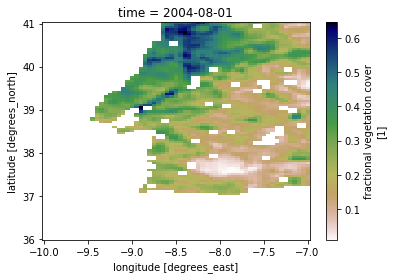

In [14]:
# load the FVC datacube and plot a simple imshow plot to check the area of interest

fname = 'http://psd.cube.eumetsat.int/thredds/dodsC/LSASAF_CDR_FVC_D/LSASAF_CDR_FVC_D.nc'
nc = xr.open_dataset(fname)
# print(nc)

#limit region of interest (southern Portugal)
datacube = nc['fvc'].sel(lat=slice(36,41),lon=slice(-10,-7)) 
var = datacube.sel(time=datacube.time.dt.month.isin([8])) #select all records whose date.month is August
var1 = var.isel(time=0) # let's check the first timeslot
var1.plot.imshow(cmap='gist_earth_r')

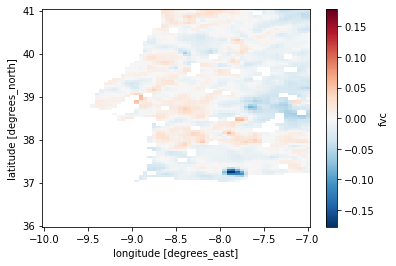

In [4]:
# now we compute the climatology over this region for the month of August (i.e. the month right after the fire)
# note: this usually takes a few seconds to compute
climmean = var.mean(dim='time')
# climmean.plot.imshow()

# from the dataset containing all the months of August in the datacube,
# select all the records of the fire year (2012, fire happened in mid-July)
lstyear = var.sel(time=var.time.dt.year.isin(2012)).mean(dim='time')
anom =lstyear-climmean

anom.plot.imshow()

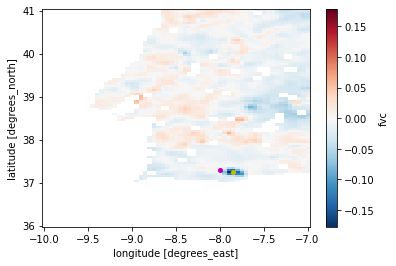

In [22]:

# a clear negative anomaly shows up in southern Portugal - this is where the fire occured
# lets check how the anomaly evolves in time
# we select one location within the scar and one in its neighborhood, where the fvc values evolves as usual

latIn = 37.25
lonIn = -7.85
latOut = 37.3
lonOut = -8.0

plt.figure()
anom.plot.imshow()

plt.plot(lonIn,latIn,'yo',markersize=4)
plt.plot(lonOut,latOut,'mo',markersize=4)



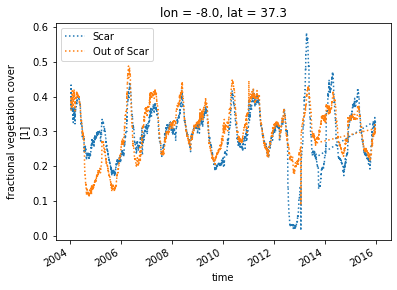

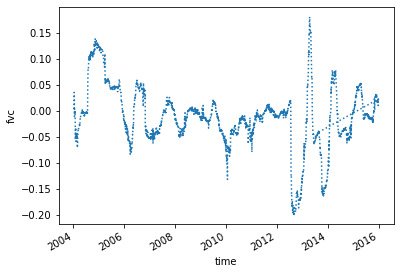

In [24]:
# extract timeseries for both locations from the full datacube
fvcIn = datacube.sel(lat=latIn,lon=lonIn)
fvcOut = datacube.sel(lat=latOut,lon=lonOut)

plt.figure()
fvcIn.plot(linestyle='dotted',label='Scar')
fvcOut.plot(linestyle='dotted',label='Out of Scar')
plt.legend()

# we can see that both pixels had similar seasonal cycles previously to the wildfire
# in mid-july 2012, the pixel within the scar suffers a sudden drop in fvc, while
# the pixel out of the scar remains with the usual seasonal cycle

# the anomaly can be estimated by taking the difference between both curves
anom_tseries = fvcIn-fvcOut

plt.figure()
anom_tseries.plot(linestyle='dotted')

# interpretation: after the fire, vegetation within the scar vanishes.
# after the first rains, low vegetation grows rapidily, with its FVC actually exceeding
# the value outside the scar (with well-developed vegetation) 
# after a couple of years, the seasonal cycles become more similar, 
# indicating the vegetation within the scar has recovered

In [11]:
# the last record in the timeseries is out of place. the issue is being corrected
print(fvcIn.time[-10:])

<xarray.DataArray 'time' (time: 10)>
array(['2015-12-21T00:00:00.000000000', '2015-12-22T00:00:00.000000000',
       '2015-12-23T00:00:00.000000000', '2015-12-24T00:00:00.000000000',
       '2015-12-25T00:00:00.000000000', '2015-12-26T00:00:00.000000000',
       '2015-12-27T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2015-12-29T00:00:00.000000000', '2013-08-21T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    lon      float32 -7.85
    lat      float32 37.25
  * time     (time) datetime64[ns] 2015-12-21 2015-12-22 ... 2013-08-21
Attributes:
    standard_name:     time
    axis:              T
    long_name:         time
    stored_direction:  increasing
    _ChunkSizes:       512
